In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
label_heads = ['latticeDetuning']
labels = [[['-5'], [142270, 142401]],
          [['-5'], [142403, 142468]],
          [['-5'], [142491, 142541]],
          [['-5'], [142543, 142593]],
          [['-5'], [142713, 142772]],
          [['-5'], [142841, 142924]],
          [['-5'], [143054, 143188]],
          [['-5'], [143195, 143260]]
                 ]

labels_TOF = [[['-5'], [143287, 143307]],
          [['-5'], [143344, 143427]],
          [['-5'], [143437, 143457]],
          [['-5'], [143500, 143520]],
          [['-5'], [143586, 143627]],
          [['-5'], [143648, 143668]]
             ]

excluded = [143588, 143444, 143426]

In [3]:
"""ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth', 'ODT3_Comp', 'Y_rotation']
fitVariables = ['nCount', 'xWidth', 'yWidth']

df = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df['Y_rotation'] = df['Y_rotation'].astype(bool)
df.to_pickle('data_save_210428.pickle')

df_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df_TOF[column] = df_TOF[column].astype(float)
    except:
        pass
df_TOF['Y_rotation'] = df_TOF['Y_rotation'].astype(bool)
df_TOF.to_pickle('data_save_210428_TOF.pickle')"""

"ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth', 'ODT3_Comp', 'Y_rotation']\nfitVariables = ['nCount', 'xWidth', 'yWidth']\n\ndf = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df[column] = df[column].astype(float)\n    except:\n        pass\ndf['Y_rotation'] = df['Y_rotation'].astype(bool)\ndf.to_pickle('data_save_210428.pickle')\n\ndf_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df_TOF[column] = df_TOF[column].astype(float)\n    except:\n        pass\ndf_TOF['Y_rotation'] = df_TOF['Y_rotation'].astype(bool)\ndf_TOF.to_pickle('data_save_210428_TOF.pickle')"

In [4]:
df = pd.read_pickle('data_save_210428.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

df_TOF = pd.read_pickle('data_save_210428_TOF.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df_TOF['imageID'].isin(excluded))[0])
df_TOF.drop(indexNames, inplace = True)

In [21]:
df_TOF

,BECHoldTime,TOF,latticeDepth,ODT3_Comp,Y_rotation,nCount,xWidth,yWidth,imageID,latticeDetuning
0,20.0,4.0,1.90,0.0,False,81224.0,26.0783,21.6063,143287.0,-5.0
1,20.0,3.0,1.90,0.0,False,53765.0,24.2313,14.9011,143288.0,-5.0
2,20.0,5.0,1.90,0.0,False,69338.0,36.6665,27.8679,143289.0,-5.0
3,20.0,4.5,1.90,0.0,False,65405.0,35.7975,26.5339,143290.0,-5.0
4,20.0,4.5,1.90,0.0,False,62395.0,27.6307,21.8104,143291.0,-5.0
...,...,...,...,...,...,...,...,...,...,...
205,20.0,6.0,0.02,0.0,False,71326.0,11.8414,15.3137,143664.0,-5.0
206,20.0,5.0,0.02,0.0,False,82961.0,10.0234,13.4650,143665.0,-5.0
207,20.0,5.5,0.02,0.0,False,84115.0,10.0749,16.4208,143666.0,-5.0
208,20.0,7.0,0.02,0.0,False,100671.0,11.0536,21.4699,143667.0,-5.0


In [6]:
latticeDepthList = df['latticeDepth'].unique()
Y_rotationList = df['Y_rotation'].unique()
BECHoldTimeList = df['BECHoldTime'].unique()
latticeDetuningList = df['latticeDetuning'].unique()

In [7]:
np.sort(latticeDepthList)

array([0.02, 0.03, 0.05, 0.1 , 0.2 , 0.4 , 0.6 , 1.  , 1.5 , 1.9 ])

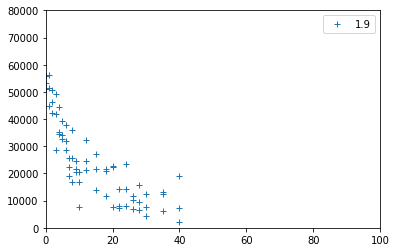

In [8]:
def getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = 25):
    df_temp = df[df['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp2 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp

plt.figure()
for latticeDepth in [1.9]:
    df_temp = getRun(df, latticeDepth, latticeDetuning = 25)
    plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
plt.ylim(0, 80000)
plt.xlim(0,100)
plt.show()

In [9]:
results = []
results_pure = []
results_lin = []


from scipy.optimize import curve_fit

def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)

def fitRun(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    alpha_guess = 1/time_guess
    gamma_guess = 1/(N0_guess**2*time_guess)
    popt, pcov = curve_fit(N_polarized, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, alpha_guess, gamma_guess],
                          )#bounds = ((N0_guess/10, alpha_guess/10, gamma_guess/100), (N0_guess*10, alpha_guess*10, gamma_guess*100)),
                           #method = 'trf'
                      #)
    return popt, pcov

def fitRun_pure(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized_pure3b, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/(N0_guess**2*time_guess)],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

def fitRun_lin(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_linear, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, N0_guess/time_guess],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun(df_run)
            results += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'N0' : popt[0],
                            'alpha' : min(-10**(-10), popt[1]),
                             'gamma' : popt[2]
                        }]
resultsDF = pd.DataFrame(results)

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun_pure(df_run)
            results_pure += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'N0' : popt[0],
                            'alpha' : 0,
                             'gamma' : popt[1]
                        }]
resultsDF_pure = pd.DataFrame(results_pure)

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun_lin(df_run[df_run['BECHoldTime']<100])
            results_lin += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'N0' : popt[0],
                             'b' : popt[1]
                        }]
resultsDF_lin = pd.DataFrame(results_lin)

#print('\n')
#print(resultsDF)
#perr = np.sqrt(np.diag(pcov))

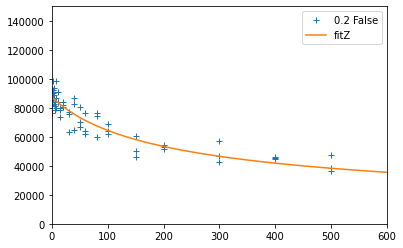

In [10]:
def getResult(dfResult, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = dfResult[dfResult['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

latticeDepth = 0.2
latticeDetuning = -5

df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultZ = getResult(resultsDF_pure, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(0, 150000)
plt.xlim(0,600)
plt.show()

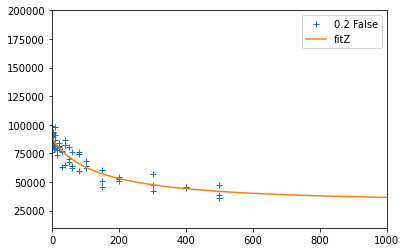

In [11]:
latticeDepth = 0.2
latticeDetuning = -5

df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultZ = getResult(resultsDF, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]

Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(10000,200000)
plt.xlim(0,1000)
plt.show()

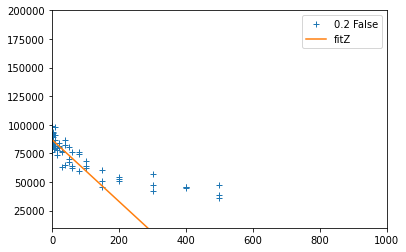

In [12]:
latticeDepth = 0.2
latticeDetuning = -5

df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultZ = getResult(resultsDF_lin, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NZ, bZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4]

Z = N_linear(time, NZ, bZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(10000,200000)
plt.xlim(0,1000)
plt.show()

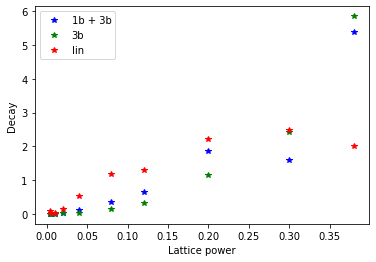

In [13]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDepth = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()

plt.figure()
plt.plot(latticeDepth, decay_1b3b, 'b*', label = '1b + 3b')
plt.plot(latticeDepth, decay_3b, 'g*', label = '3b')
plt.plot(latticeDepth, decay_lin, 'r*', label = 'lin')
plt.xlabel("Lattice power")
plt.ylabel("Decay")


plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

The increase in power should result in a smaller cloud. The density is proportional to $n\sim 1/(a_{oh}r_{\perp}^{2}) \sim \sqrt{\omega_{z}}\frac{\omega_{\perp}^{2}}{\mu}$. Assuming the chemical potential constant, the density $n$ goes like $(P/\Delta)^{5/4}$. In that case the decay coefficient which is proportional to $n^{2}$ should be scalled accordingly.
If we rather fix the scattering length $a$ and write $\mu\sim na$ then at constant $a$ it gives $n \sim (P/\Delta)^{5/8})$.

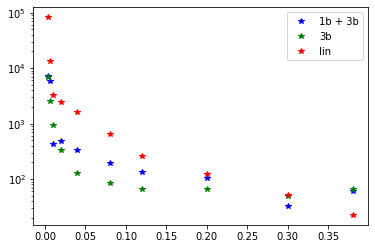

In [14]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDensity = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()/latticeDensity**(5/2)
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()/latticeDensity**(5/2)
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()/latticeDensity**(5/2)

plt.figure()
plt.semilogy(latticeDensity, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(latticeDensity, decay_3b, 'g*', label = '3b')
plt.semilogy(latticeDensity, decay_lin, 'r*', label = 'lin')

plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

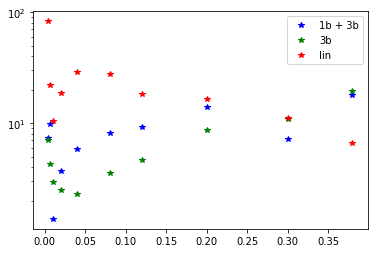

In [15]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDensity = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()/latticeDensity**(5/4)
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()/latticeDensity**(5/4)
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()/latticeDensity**(5/4)

plt.figure()
plt.semilogy(latticeDensity, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(latticeDensity, decay_3b, 'g*', label = '3b')
plt.semilogy(latticeDensity, decay_lin, 'r*', label = 'lin')

plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

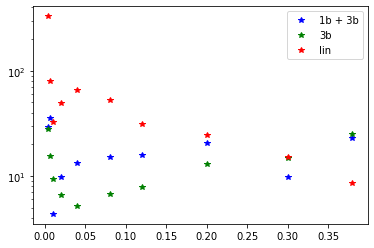

In [16]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDensity = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()/latticeDensity**(3/2)
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()/latticeDensity**(3/2)
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()/latticeDensity**(3/2)

plt.figure()
plt.semilogy(latticeDensity, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(latticeDensity, decay_3b, 'g*', label = '3b')
plt.semilogy(latticeDensity, decay_lin, 'r*', label = 'lin')

plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

Now let's look at the TOF series

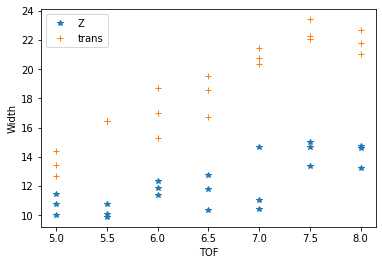

In [17]:
df_TOF
latticeDepthList_TOF = df_TOF['latticeDepth'].unique()

plt.figure()
for latticeDepth in latticeDepthList_TOF[-1:]:
    df_run = getRun(df_TOF, latticeDepth, False, -5)
    plt.plot(df_run['TOF'], df_run['xWidth'], '*', label = 'Z')
    plt.plot(df_run['TOF'], df_run['yWidth'], '+', label = 'trans')
    
plt.xlabel("TOF")
plt.ylabel("Width")
plt.legend()
plt.show()

In [18]:
def sigma(t, sigma0, v):
    return np.sqrt(sigma0**2+(v*t)**2)

def fitRun_sigma(df_run, XorY = 'xWidth'):
    sigma0_guess = df_run[XorY].min()
    v_guess = df_run[XorY].max()/df_run['TOF'].max()
    popt, pcov = curve_fit(sigma, df_run['TOF'], df_run[XorY],
                       p0 = [sigma0_guess, v_guess]
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

results_sigma = []
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df_TOF, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            print(latticeDepth)
            popt_Z, pcov_Z = fitRun_sigma(df_run, 'xWidth')
            print('xRun ok')
            popt_trans, pcov_trans = fitRun_sigma(df_run, 'yWidth')
            print('yRun ok')
            results_sigma += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'sigma0_Z' : popt_Z[0],
                            'v_Z' : popt_Z[1],
                            'sigma0_trans' : popt_trans[0],
                            'v_trans' : popt_trans[1],
                        }]
resultsDF_sigma = pd.DataFrame(results_sigma)

1.5
xRun ok
yRun ok
1.9
xRun ok
yRun ok
1.0
xRun ok
yRun ok
0.6
xRun ok
yRun ok
0.4
xRun ok
yRun ok
0.2
xRun ok
yRun ok
0.1
xRun ok


/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


yRun ok
0.05
xRun ok
yRun ok
0.03
xRun ok
yRun ok
0.02
xRun ok
yRun ok


/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [129]:
resultsDF_sigma

,latticeDetuning,latticeDepth,Y_rotation,sigma0_Z,v_Z,sigma0_trans,v_trans
0,-5.0,1.50,False,10.067422,6.900287,4.493345,4.116898
1,-5.0,1.90,False,5.445297,7.241324,0.000025,5.359775
2,-5.0,1.00,False,9.006255,5.676799,5.249421,3.642702
3,-5.0,0.60,False,6.188615,6.056395,5.061145,3.455295
4,-5.0,0.40,False,9.115527,3.656734,6.124299,3.119208
5,-5.0,0.20,False,7.110402,3.789062,5.746557,3.425045
6,-5.0,0.10,False,6.538612,2.632645,6.269707,3.436789
7,-5.0,0.05,False,7.130991,1.969506,6.243062,3.410508
8,-5.0,0.03,False,6.944506,1.819348,5.081816,3.302956
9,-5.0,0.02,False,6.460459,1.577834,-0.000140,2.869985


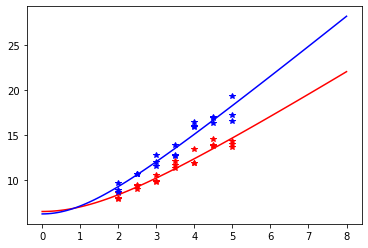

In [19]:
latticeDetuning = -5
latticeDepth = 0.1

tof = np.linspace(0, 8, 100)
df_run = getRun(df_TOF, latticeDepth, False, latticeDetuning)
df_res = getResult(resultsDF_sigma, latticeDepth, False, latticeDetuning)
sigma0_Z, v_Z, sigma0_trans, v_trans = df_res.iloc[0,3:7]
#sigma0_Z, v_Z = 8, 4
sigma_Z_fit = sigma(tof, sigma0_Z, v_Z)
sigma_trans_fit = sigma(tof, sigma0_trans, v_trans)

plt.figure()
plt.plot(tof, sigma_Z_fit, 'r-')
plt.plot(tof, sigma_trans_fit, 'b-')
plt.plot(df_run['TOF'], df_run['xWidth'], 'r*')
plt.plot(df_run['TOF'], df_run['yWidth'], 'b*')
#plt.ylim(0,2*max(sigma_Z_fit))
plt.show()

In [20]:
df_TOF[df_TOF["latticeDepth"] == 0.1]

,BECHoldTime,TOF,latticeDepth,ODT3_Comp,Y_rotation,nCount,xWidth,yWidth,imageID,latticeDetuning
126,20.0,5.0,0.1,0.0,False,95829.0,14.36020,17.22160,143500.0,-5.0
127,20.0,4.0,0.1,0.0,False,82193.0,13.43960,16.41980,143501.0,-5.0
128,20.0,3.5,0.1,0.0,False,94652.0,11.38950,12.83820,143502.0,-5.0
129,20.0,4.0,0.1,0.0,False,86989.0,11.89670,16.04810,143503.0,-5.0
130,20.0,3.0,0.1,0.0,False,90170.0,9.76909,12.81490,143504.0,-5.0
131,20.0,2.5,0.1,0.0,False,92545.0,9.49509,10.65330,143505.0,-5.0
132,20.0,4.5,0.1,0.0,False,71922.0,13.83970,17.02620,143506.0,-5.0
133,20.0,4.5,0.1,0.0,False,83637.0,14.59410,16.86500,143507.0,-5.0
134,20.0,2.0,0.1,0.0,False,76804.0,7.89393,9.64598,143508.0,-5.0
135,20.0,4.5,0.1,0.0,False,81705.0,13.93340,16.37840,143509.0,-5.0


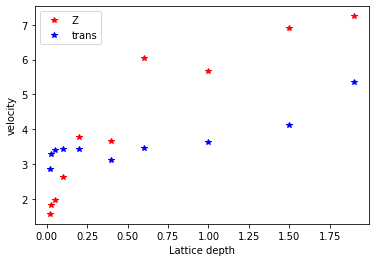

In [132]:
plt.figure()
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_Z'], 'r*', label = 'Z')
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_trans'], 'b*', label = 'trans')
plt.legend()
#plt.ylim(0, 5)
plt.ylabel("velocity")
plt.xlabel("Lattice depth")
plt.show()


# add velocity scale = hbar*k // recoil temperature

Calculate the velocity to temperature conversion. Here $\sigma = \sqrt{\sigma_0^{2}+(\sigma_{v}t)^{2}}$ is fitted from a gaussian distribution $\exp(-\frac{1}{2}\frac{x^{2}}{\sigma^{2}})$ where $x = vt$, so $v$ is distributed like a gaussian with width $\sigma_{v}$ which is the result of the fit $P(v) \sim \exp(-\frac{1}{2}\frac{v^{2}}{\sigma_{v}^{2}}) \sim \exp(-\frac{\frac{1}{2}mv^{2}}{k_{B}T})$. Therefore we find:
\[ \sigma_{v} = \sqrt{\frac{k_{B}T}{m}}\]

In [133]:
m_Dy = 164*1.66*10**(-27)
k_B = 1.38*10**(-23)
pixel_size = 3.45*10**(-6)
tof_unit = 10**(-3)
magnification = 3
resultsDF_sigma['temperature_Z'] = m_Dy*(resultsDF_sigma['v_Z']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma['temperature_trans'] = m_Dy*(resultsDF_sigma['v_trans']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma

,latticeDetuning,latticeDepth,Y_rotation,sigma0_Z,v_Z,sigma0_trans,v_trans,temperature_Z,temperature_trans
0,-5.0,1.50,False,10.067422,6.900287,4.493345,4.116898,1.242232e-06,4.421898e-07
1,-5.0,1.90,False,5.445297,7.241324,0.000025,5.359775,1.368058e-06,7.494828e-07
2,-5.0,1.00,False,9.006255,5.676799,5.249421,3.642702,8.407668e-07,3.461910e-07
3,-5.0,0.60,False,6.188615,6.056395,5.061145,3.455295,9.569669e-07,3.114861e-07
4,-5.0,0.40,False,9.115527,3.656734,6.124299,3.119208,3.488633e-07,2.538384e-07
5,-5.0,0.20,False,7.110402,3.789062,5.746557,3.425045,3.745691e-07,3.060562e-07
6,-5.0,0.10,False,6.538612,2.632645,6.269707,3.436789,1.808227e-07,3.081586e-07
7,-5.0,0.05,False,7.130991,1.969506,6.243062,3.410508,1.012006e-07,3.034636e-07
8,-5.0,0.03,False,6.944506,1.819348,5.081816,3.302956,8.635752e-08,2.846256e-07
9,-5.0,0.02,False,6.460459,1.577834,-0.000140,2.869985,6.495181e-08,2.148957e-07
